In [1]:
import numpy as np
from math import factorial
from matplotlib import pyplot as plt

In [2]:
def combinations(n, k):
    return int(factorial(n) / (factorial(k) * factorial(n - k)))

### Задача 1

Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Составьте закон распределения числа правильных ответов при простом угадывании. Найдите M(X), D(X).

### Решение
Пусть X  - дискретная случайная величина.

По условию: n = 5(число вопросов), p = 1/4(вероятность угадать)

**По формуле Бернулли:**

$$P(X = k) = C_5^k * (3/4)^{5-k} * (1/4)^k$$

$$P(X = 5) = C_5^5 * (3/4)^0 * (1/4)^5 =  \dfrac{1}{1024}$$

$$P(X = 4) = C_5^4 * (3/4)^1 * (1/4)^4 =  \dfrac{15}{1024}$$

$$P(X = 3) = C_5^3 * (3/4)^2 * (1/4)^3 =  \dfrac{90}{1024}$$

$$P(X = 2) = C_5^2 * (3/4)^3 * (1/4)^2 =  \dfrac{270}{1024}$$

$$P(X = 1) = C_5^1 * (3/4)^4 * (1/4)^1 =  \dfrac{405}{1024}$$

$$P(X = 0) = C_5^0 * (3/4)^5 * (1/4)^0 =  \dfrac{243}{1024}$$

#### Построим график распределения

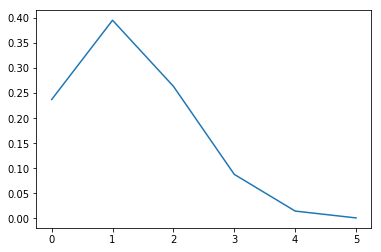

In [3]:
x = [0,1,2,3,4,5]
y = [243/1024, 405/1024,270/1024,90/1024,15/1024,1/1024]
plt.plot(x,y)

### Найдем M(X), D(X)

In [4]:
## M(X) = np
M_x = 5*(1/4)
print("M(X) = ",M_x)

M(X) =  1.25


In [5]:
## D(X) = np(1-p)
D_x = 5*(1/4)*(3/4)
print("D(X) = ",D_x)

D(X) =  0.9375


### Задача 2

Вероятность попадания в цель при одном выстреле равна 0.01. Какова вероятность того, что число попаданий при 200 выстрелах будет не менее 5 и не более 10?

#### Решение

Так как искомая вероятность - попадание от 5 до 10 раз, то есть или 5 или 6 или 7 или 8 или 9 или 10

посчитаем вероятность для каждого события(5...10 попаданий)

$$P_{200}(k) = C_{200}^k * 0,01^k * 0,99^{200-k}$$

In [6]:
def countP(n,k,p):
    return combinations(n,k) * (p**k) * ((1-p)**(n-k))

In [7]:
for i in range(5,11):
    P = countP(200,i,0.01)
    print("Вероятность попадания ", i, " раз - ", P)

Вероятность попадания  5  раз -  0.03572335672160829
Вероятность попадания  6  раз -  0.011727364580325954
Вероятность попадания  7  раз -  0.0032829851783307863
Вероятность попадания  8  раз -  0.0008000203780528306
Вероятность попадания  9  раз -  0.000172394963620812
Вероятность попадания  10  раз -  3.326003843593443e-05


Искомая вероятность может быть найдена по формуле сложения вероятностей:


$$P_{200}(5<=k<=10) = P_{200}(5) + P_{200}(6) + P_{200}(7) + P_{200}(8) + P_{200}(9) + P_{200}(10)$$

In [8]:
P = 0
for i in range(5,11):
    # складываем вероятности
    P = P + countP(200,i,0.01)
P

0.051739381860374606

$$P_{200}(5<=k<=100) = 0.051739381860374606$$

### Задача 3

В условиях предыдущей задачи сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 10 раз будет совершено попадание?

Подсказка. Как посчитать P(X >= k) для величины X, имеющей распределение Пуассона? Здесь предстоит немножко покодить.

##### P(X >= k) = 1 - P(X < k) 

Из этого получаем:

$$P(k >= 10) = 1 - P(k < 10)$$

$$P(k >= 10) = 1 - P(9) - P(8) - P(7) - P(6) - P(5) - P(4) - P(3) - P(2) - P(1) - P(0)$$

Для того, чтобы найти число выстрелов, при которых вероятность попадания хотя бы 10 раз равна 0.9, я сделал слудующие:

ниже функция, считает вероятнсоть по формуле выше, начиная с 1000 выстрелов. При вероятности меньше 0.9 вызывает саму себя и увелечивает кол-во выстрелов до тех пор, пока вероятность не будет равна 0.9

In [9]:
def countP2(n, k):
    step = 30 # шаг с которым увеличиваем кол-во выстрелов(чем меньше шаг, тем больше точность)
    # считаем вероятность получить менее 10 попаданий
    _P = 0
    for i in range(0,k):
        # используем функицю для прошлого задания
        _P = _P + countP(n,i,0.01)
    # вычитаем из 1 и получаем искомую вероятсноть
    P = 1 - _P
    
    print("Число выстрелов - ", n)
    print("Вероятность попадания хотя бы в 10 целей - ", P)
    print("----------------")
    
    if P < 0.9:
        countP2(n + step, 10)

In [10]:
countP2(1000,10)

Число выстрелов -  1000
Вероятность попадания хотя бы в 10 целей -  0.5426994078251132
----------------
Число выстрелов -  1030
Вероятность попадания хотя бы в 10 целей -  0.5797878314840156
----------------
Число выстрелов -  1060
Вероятность попадания хотя бы в 10 целей -  0.6154876174180712
----------------
Число выстрелов -  1090
Вероятность попадания хотя бы в 10 целей -  0.6495945662615878
----------------
Число выстрелов -  1120
Вероятность попадания хотя бы в 10 целей -  0.681950182000826
----------------
Число выстрелов -  1150
Вероятность попадания хотя бы в 10 целей -  0.7124397352820362
----------------
Число выстрелов -  1180
Вероятность попадания хотя бы в 10 целей -  0.740989277145383
----------------
Число выстрелов -  1210
Вероятность попадания хотя бы в 10 целей -  0.767561897204436
----------------
Число выстрелов -  1240
Вероятность попадания хотя бы в 10 целей -  0.7921534951346691
----------------
Число выстрелов -  1270
Вероятность попадания хотя бы в 10 целей - 